In [1]:
#function for image compression and use the knn method, the output is the sucess rate for identifying the image
def image_iden(zero, one, test_ruth, n): 
    #zero is the train set of zero, one is the train set of one, and n is the principle component
    #test_truth record the true mean of the image in test set
    ones_svd = list(range(40))
    zeros_svd = list(range(40))
    
    #for SVD compression, ones_svd includes the matrix that has already compressed
    for i in range(40):
        one_u, one_s, one_d = np.linalg.svd(ones[i])
        zero_u, zero_s, zero_d = np.linalg.svd(zeros[i])
        compress_zero = np.dot(zero_u[:,:n],np.diag(zero_s)[:n,:n])
        compress_zero = np.dot(compress_zero,zero_d[:n,:])
        compress_one = np.dot(one_u[:,:n],np.diag(one_s)[:n,:n])
        compress_one = np.dot(compress_one,one_d[:n,:])
        ones_svd[i] = np.asarray(compress_one)
        zeros_svd[i] = np.asarray(compress_zero) 
        
        ones_svd_distances = list(range(20))
        zeros_svd_distances = list(range(20))
    #value the distance between the compress image and the image in the test set through norm
    for i in range(20):
        ones_svd_distance = [np.linalg.norm(compress_one - test[i]) for compress_one in ones_svd]
        zeros_svd_distance = [np.linalg.norm(compress_zero - test[i]) for compress_zero in zeros_svd]
        ones_svd_distances[i] = np.asarray(ones_svd_distance)
        zeros_svd_distances[i] = np.asarray(zeros_svd_distance)
            
    result = []
    #cloest neighbor method with k = 1
    for m in range(20):
        if min(zeros_svd_distances[m]) < min(ones_svd_distances[m]):
            result.append(0)
        else:
            result.append(1)
                    
    #calcualte the rate that identify the image properly.
    count = 0
    set = test_truth - result
    for m in range(20):
        if set[m] != 0:
            count = count + 1
    
    success_rate = 1 - count/20
    return success_rate

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ones = []
zeros = []
test = []

In [4]:
#import image from sets
for i in range(40):
    one = Image.open("training_ones/"+str(i)+".png").convert('L')
    zero = Image.open("training_zeros/"+str(i)+".png").convert('L')
    ones.append(np.asarray(one))
    zeros.append(np.asarray(zero))

for i in range(20):
    t = Image.open("test/"+str(i)+".png").convert('L')
    test.append(np.asarray(t))

test_truth = np.array([0,1,0,0,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1])

In [13]:
#generate the success rate for each number of principle component
success_rate = list(range(99))
for i in range(99):
    success_rate[i] = image_iden(zeros,ones,test_truth,n=(i+1))

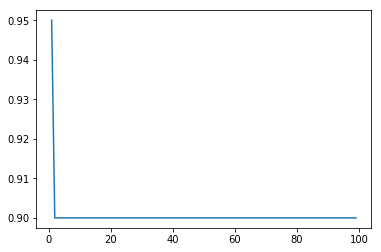

In [14]:
#use plot to show the success rate change varied from the number of principle component
plt.plot(range(1,100),success_rate)
plt.show()

In [ ]:
#As is shown by the plot, the success rate is .95 with only one principle component, and the success rate is .9 with 
#other number of principle component. So the smallest number for principle component in this situation is 1

In [71]:
#hw 1.c
#let me first def a method to get the distance for knn
def avg_min_distance(dataset, k ):
    store_min = []
    for i in range(k):
        min1 = min(dataset)
        store_min.append(min1)
        dataset = np.delete(dataset, np.argmin(dataset))
    return np.mean(store_min)

In [74]:
#redef the function image_iden
#function for image compression and use the knn method, the output is the sucess rate for identifying the image
def image_iden_k(zero, one, test_ruth, n, k): 
    #zero is the train set of zero, one is the train set of one, and n is the principle component
    ones_svd = list(range(40))
    zeros_svd = list(range(40))
    
    #for SVD compression, ones_svd includes the matrix that has already compressed
    for i in range(40):
        one_u, one_s, one_d = np.linalg.svd(ones[i])
        zero_u, zero_s, zero_d = np.linalg.svd(zeros[i])
        compress_zero = np.dot(zero_u[:,:n],np.diag(zero_s)[:n,:n])
        compress_zero = np.dot(compress_zero,zero_d[:n,:])
        compress_one = np.dot(one_u[:,:n],np.diag(one_s)[:n,:n])
        compress_one = np.dot(compress_one,one_d[:n,:])
        ones_svd[i] = np.asarray(compress_one)
        zeros_svd[i] = np.asarray(compress_zero) 
        
        ones_svd_distances = list(range(20))
        zeros_svd_distances = list(range(20))
    #value the distance between the compress image and the image in the test set through norm
    for i in range(20):
        ones_svd_distance = [np.linalg.norm(compress_one - test[i]) for compress_one in ones_svd]
        zeros_svd_distance = [np.linalg.norm(compress_zero - test[i]) for compress_zero in zeros_svd]
        ones_svd_distances[i] = np.asarray(ones_svd_distance)
        zeros_svd_distances[i] = np.asarray(zeros_svd_distance)
            
    result = []
    #cloest neighbor method with k 
    for m in range(20):
        if avg_min_distance(zeros_svd_distances[m],k) < avg_min_distance(ones_svd_distances[m],k):
            result.append(0)
        else:
            result.append(1)
                    
    #calcualte the rate that identify the image properly.
    count = 0
    set = test_truth - result
    for m in range(20):
        if set[m] != 0:
            count = count + 1
    
    success_rate = 1 - count/20
    return success_rate

In [80]:
#generate the success rate for each number of principle component with k =2 and k=3 
success_rate_2 = list(range(99))
for i in range(99):
    success_rate_2[i] = image_iden_k(zeros,ones,test_truth,n=(i+1), k =2)

success_rate_3 = list(range(99))
for i in range(99):
    success_rate_3[i] = image_iden_k(zeros,ones,test_truth,n=(i+1), k =3)

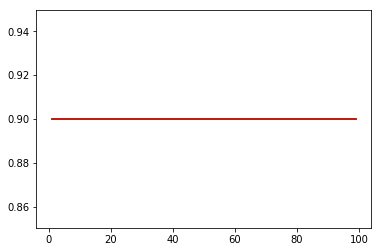

In [85]:
plt.plot(range(1,100),success_rate,'b')
plt.plot(range(1,100),success_rate_2,'g')
plt.plot(range(1,100),success_rate_3,'r')
plt.show()

In [ ]:
#as is shown by the plot, with k increasing to 2 and 3, the success rate doesn't change. 
#1.d hence, i would choose to let k = 1 and n = 1 for this problem.